<a href="https://colab.research.google.com/github/analyst-rhie/Kaggle/blob/main/Lean_OpenCV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle
from google.colab import files
# 1. 캐글 계정 Account -> Account -> Create New API token 을 눌러 내 계정 Api를 저장한다.
# 2. Api 형태인 json파일을 가져온다. 이때 파일이름은 kaggle.json 이다.
# 3. 내 colab에 file upload를 한다
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kanon93","key":"2a4deec764f5519f77536baaf4a8ad33"}'}

In [5]:

# 4. 파일이 잘 저장되어 있는지 확인한다.
!ls -1ha kaggle.json
!ls -al
!mkdir -p ~/.kaggle

# 5. kaggle 폴더를 생성하고 내 kaggle Api json을 복사한다.
!mkdir -p ~/.kaggle #kaggle 이름의 폴더 만들기
!cp kaggle.json ~/.kaggle/ # permission warning이 발생 않도록 파일 복사
!chmod 600 ~/.kaggle/kaggle.json # kaggle.josn(내 계정 API)에 대한 읽기/쓰기 권한 주기

# 6. 올바르게 내 Api와 연동되는지 대회 리스트를 불러와 본다.
#!kaggle competitions list # 참가한 대회 리스트 불러오기
#!pwd
# -> kaggle 폴더가 생성하지 않아 수동으로 생성하였음.

# 7. 캐글 대회 데이터를 다운로드 한다. 각 kaggle 대회 메인페이지의 Data 탭에서 Api다운이 가능하다.
!kaggle datasets download -d bulentsiyah/opencv-samples-images

# !cd content/kaggle 로 이동하여 파일을 압축헤제하려 했으나 !pwd 로 절대경로 확인시 content 폴더외의 다른 디렉토리로 이동하지 못하여 content에 압축풀고 직접 옮기기로 함.
!unzip opencv-samples-images.zip

kaggle.json
total 20
drwxr-xr-x 1 root root 4096 Sep 23 05:12 .
drwxr-xr-x 1 root root 4096 Sep 23 05:08 ..
drwxr-xr-x 4 root root 4096 Sep 16 13:39 .config
-rw-r--r-- 1 root root   63 Sep 23 05:12 kaggle.json
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
 38% 5.00M/13.3M [00:00<00:00, 49.4MB/s]
100% 13.3M/13.3M [00:00<00:00, 62.3MB/s]
Archive:  opencv-samples-images.zip
  inflating: Background-Subtraction-Tutorial_merged.gif  
  inflating: Background-Subtraction-Tutorial_merged.mp4  
  inflating: Background_Subtraction_Tutorial_frame.mp4  
  inflating: Background_Subtraction_Tutorial_frame.png  
  inflating: Background_Subtraction_Tutorial_frame_1.png  
  inflating: Origin_of_Species.jpg   
  inflating: WaldoBeach.jpg          
  inflating: blobs.jpg               
  inflating: data/Blender_Suzanne1.jpg  
  inflating: data/Blender_Suzanne2.jpg  
  inflating: data/HappyFish.jpg      
  inflating: data/LinuxLogo.jpg      
  inflating: data/WindowsLogo.jpg    
  inflating: data/ae

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 이미지 경로
path = "/content/data/"
path2 = "/content/"

### Sharpening
이미지에 엣지를 강조하거나 강화하는 효과를 주는 ***샤프닝*** 효과이다.

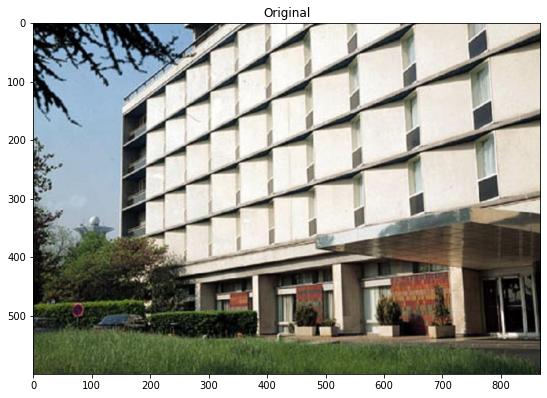

In [7]:
image = cv2.imread(path + 'building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #기존 cv에서 저장되는 BGR을 RGB로 바꿈
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)

In [8]:
# 메트릭스내 합이 1이기 때문에 정규화를 할 수 없다. 
# 이때 샤프닝 커널을 만들어 보자.
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

# 위 image에 다시 적용해보기
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
# cv2.fillter2d(src, -1, kernel)
# -> -1은 입력 영상과 동일한 데이터의 출력 영상 생성

### cv2.filter2D
* cv2.fillter(src, ddepth, kernel, dst=None, anchor=None, delta=None, borderType=None) -> dst

  • src : 입력 영상

  • ddepth : 출력 영상 데이터 타입. (e.g) cv2.CV_8U, cv2.CV_32F, cv2.CV_64F, -1을 지정하면 src와 같은 타입의 dst 영상을 생성합니다.

  • kernel: 필터 마스크 행렬. 실수형.

  • anchor: 고정점 위치. (-1, -1)이면 필터 중앙을 고정점으로 사용

  • delta: 추가적으로 더할 값

  • borderType: 가장자리 픽셀 확장 방식

  • dst: 출력 영상

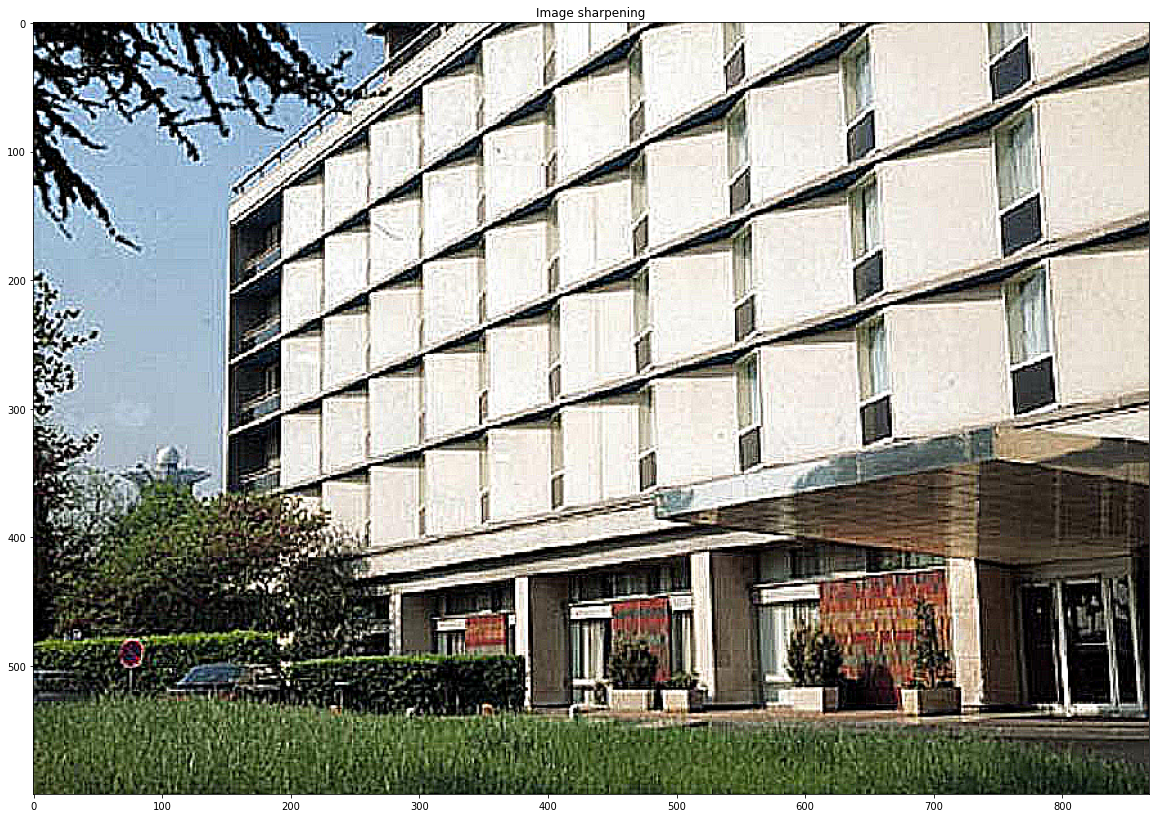

In [9]:
plt.figure(figsize=(20,20))
plt.title("Image sharpening")
plt.imshow(sharpened)

### Threshold 
* 임계값 적용
  * 특정 임계값보다 작으면 흑, 크면 백이 된다.
  * 흑과 백의 그라디언트 컬러를 만들 수 있음.

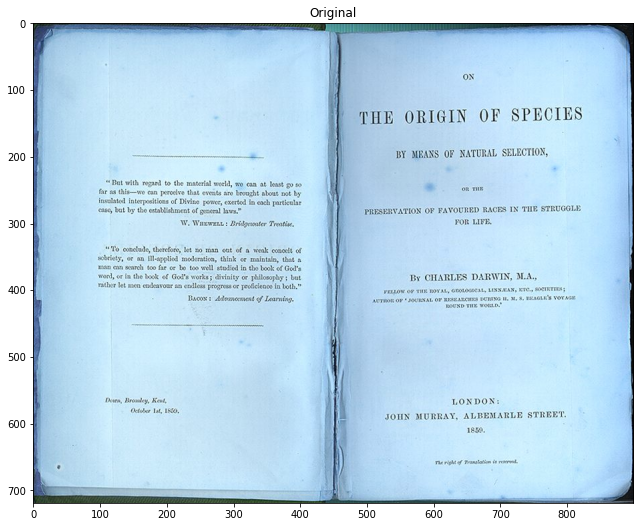

In [ ]:
image = cv2.imread('/content/Origin_of_Species.jpg',1)
# cv2.imread(경로 , 필터값 적용)
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

In [ ]:
ret, thresh1 = cv2.threshold(image,127,255, cv2.THRESH_BINARY)
# 127을 임계값으로 127보다 아래면 검정, 크면 255까지 값(흰색)을 올려라

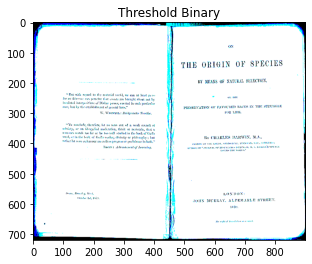

In [ ]:
plt.title("Threshold Binary")
plt.imshow(thresh1)

### Adaptive Threshold

Global threshold 는 위처럼 이미지 전체에 threshold 를 적용. 
- 이렇게(Global Threshold) 하면 음영이 다르면 일부 영역이 모두 흰색 또는 검정색으로 보여지게 되고 버려지는 영역이 많아짐.  
- 이 문제를 처리하기 위해 이미지의 작은 영역별로 나누어 Thresholding 을 하는 것이 Adaptive Threshold 이다.
- 이미지의 영역을 분할하고 임계값을 자동으로 조정해 흑백 이미지를 얻을 수 있다. 


* cv2.adaptiveThreshold(img, value, adaptiveMethod, thresholdType, blockSize, C)

  * img: gray 스케일의 값

 * value: 문턱 값 이상이되면 사용되는 value

 * adaptiveMethod: threshold를 구해주는데 사용되는 알고리즘

 * cv2.ADAPTIVE_THRESH_MEAN_C: 적용할 픽셀 (x, y)를 중심으로 하는 bookSize * bookSize안에 있는 픽셀 값의 평균에서 C를 뺀 값 

 * cv2.ADATPIVE_THRESH_GAUSSIAN_C: 적용할 픽셀 (x, y)를 중심으로 하는 bookSize * bookSize안에 있는 Gaussian 윈도우 기반 가중치들의 합에서 C를 뺀 값

 * blockSize: 문턱 값을 계산하기 위한 block크기 입니다. 이는 홀수를 해야됨. 왜냐하면 픽셀이 블럭의 중앙이 되기 때문. 

 * C: 보정 상수로 이 값이 양수이면 계산된 adaptive 문턱값에서 빼고 음수이면 더줌 

출처: https://hoony-gunputer.tistory.com/entry/opencv-python-이미지-Thresholding [후니의 컴퓨터]


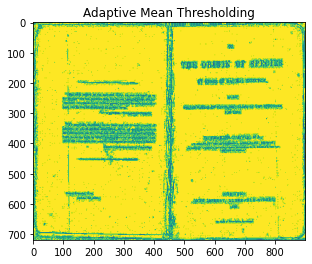

In [ ]:
ret, thresh1 = cv2.threshold(image,127,255, cv2.THRESH_BINARY)

#image = cv2.GaussianBlur(image, (3, 3), 0) # blue로 바꿀경우 adaptivThreshold가 안먹음
#-> grey로 바꿔줘야 adaptiveThreshold가 작동함.
# 출처 : https://stackoverflow.com/questions/27014207/failure-to-use-adaptivethreshold-cv-8uc1-in-function-adaptivethreshold/28145603
img_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
thresh = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh)





* THRESH_OTSU
  * 오츠의 알고리즘은 최적의 임계값을 찾아주므로 cv2.threshold() 함수에 전달하는 threshold 파라미터는 아무 값이어도 상관없습니다. 어차피 무시되기 때문입니다.

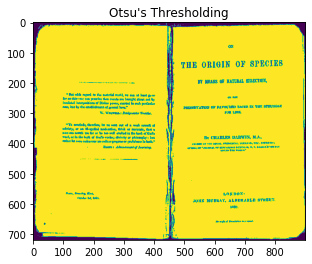

In [ ]:
_, th2 = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.title("Otsu's Thresholding")
plt.imshow(th2)

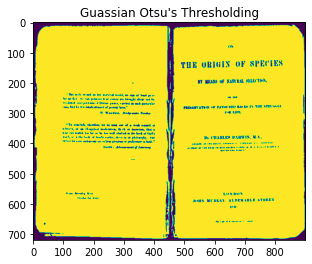

In [ ]:
blur = cv2.GaussianBlur(image, (5,5), 0)
img_grey = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) 
_, th3 = cv2.threshold(img_grey, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.title("Guassian Otsu's Thresholding")
plt.imshow(th3)
plt.show()

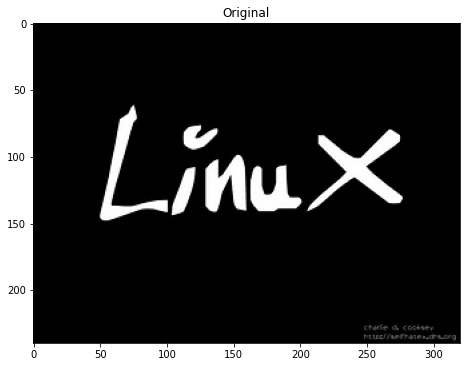

In [11]:
image = cv2.imread('/content/data/LinuxLogo.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)




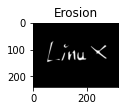

In [12]:
# 부식
# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)


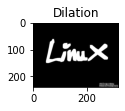

In [13]:
# 팽창
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)



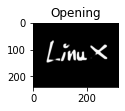

In [14]:
# 구멍내기
# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)




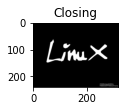

In [15]:
# 폐쇄
# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)